# Generacion de Modelos

## 0.Cargar Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

In [2]:
from sklearn.neighbors import DistanceMetric
from gower import gower_matrix
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from gower import gower_matrix
import gower
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ward, fcluster
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
import prince

## 1. Variables Categoricas - Distancia gower

### 1.1 Jerarquico

In [3]:
usuarios = pd.read_csv("df_coordenadas2.csv", index_col=0)
usuarios.head()

,brandingInterest,userAgeBracket,userGender,country,region,sessions,Lon,Lat
0,News & Politics/Avid News Readers/Entertainmen...,25-34,female,United States,California,107,36.116203,-119.681564
1,News & Politics/Avid News Readers/Entertainmen...,35-44,female,United States,California,106,36.116203,-119.681564
2,Media & Entertainment/Light TV Viewers,35-44,female,United States,California,99,36.116203,-119.681564
3,Media & Entertainment/Movie Lovers,35-44,female,United States,California,95,36.116203,-119.681564
4,Media & Entertainment/TV Lovers,35-44,female,United States,California,95,36.116203,-119.681564


In [4]:
usuarios_je = usuarios.drop(columns=['country','region','sessions'])

In [5]:
usuarios = pd.read_csv("df_coordenadas2.csv", index_col=0)
usuarios.head()
usuarios_j = usuarios.drop(columns=['country','region','sessions'])

# Seleccionar las variables categóricas
cat_vars = ['userAgeBracket', 'userGender','brandingInterest']
# Seleccionar las variables numéricas
num_vars = ['Lon', 'Lat']
scaler = StandardScaler()
usuarios_j[num_vars] = scaler.fit_transform(usuarios_j[num_vars])
df_dummies = pd.get_dummies(usuarios_j, columns=cat_vars)

In [6]:
# Seleccionar las variables categóricas
cat_vars = ['userAgeBracket', 'userGender','country','region','brandingInterest']
# Seleccionar las variables numéricas
num_vars = ['Lon', 'Lat']
usuarios_je[num_vars] = scaler.fit_transform(usuarios_je[num_vars])

In [7]:
D = pd.DataFrame.from_dict(usuarios_je)
D = D.reset_index(drop=True)
D[['userAgeBracket', 'userGender','brandingInterest']]= D[['userAgeBracket', 'userGender','brandingInterest']].astype('object')

In [8]:
distance_matrix = gower.gower_matrix(D)
pd.DataFrame(distance_matrix)

,0,1,2,3,4,5,6,7,8,9,...,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502
0,0.000000,0.200000,0.400000,0.400000,0.400000,0.400000,0.400000,0.200000,0.400000,0.200000,...,0.722188,0.287511,0.087511,0.487511,0.487511,0.487511,0.487511,0.487511,0.720999,0.455036
1,0.200000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.400000,0.200000,0.400000,...,0.522188,0.087511,0.287511,0.287511,0.287511,0.287511,0.287511,0.287511,0.720999,0.255036
2,0.400000,0.200000,0.000000,0.200000,0.200000,0.200000,0.200000,0.400000,0.200000,0.400000,...,0.522188,0.287511,0.487511,0.287511,0.287511,0.287511,0.287511,0.087511,0.720999,0.455036
3,0.400000,0.200000,0.200000,0.000000,0.200000,0.200000,0.200000,0.400000,0.200000,0.400000,...,0.522188,0.287511,0.487511,0.287511,0.287511,0.087511,0.287511,0.287511,0.720999,0.455036
4,0.400000,0.200000,0.200000,0.200000,0.000000,0.200000,0.200000,0.400000,0.200000,0.400000,...,0.522188,0.287511,0.487511,0.287511,0.287511,0.287511,0.087511,0.287511,0.720999,0.455036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,0.487511,0.287511,0.287511,0.087511,0.287511,0.287511,0.287511,0.487511,0.287511,0.487511,...,0.549732,0.200000,0.400000,0.200000,0.200000,0.000000,0.200000,0.200000,0.693455,0.367525
4499,0.487511,0.287511,0.287511,0.287511,0.087511,0.287511,0.287511,0.487511,0.287511,0.487511,...,0.549732,0.200000,0.400000,0.200000,0.200000,0.200000,0.000000,0.200000,0.693455,0.367525
4500,0.487511,0.287511,0.087511,0.287511,0.287511,0.287511,0.287511,0.487511,0.287511,0.487511,...,0.549732,0.200000,0.400000,0.200000,0.200000,0.200000,0.200000,0.000000,0.693455,0.367525
4501,0.720999,0.720999,0.720999,0.720999,0.720999,0.720999,0.720999,0.720999,0.720999,0.720999,...,0.843187,0.693455,0.693455,0.693455,0.693455,0.693455,0.693455,0.693455,0.000000,0.757394


In [9]:
Z =pd.DataFrame(distance_matrix)
Z = linkage(distance_matrix, method='ward')

C:\Users\crama\AppData\Local\Temp\ipykernel_11252\2629456914.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


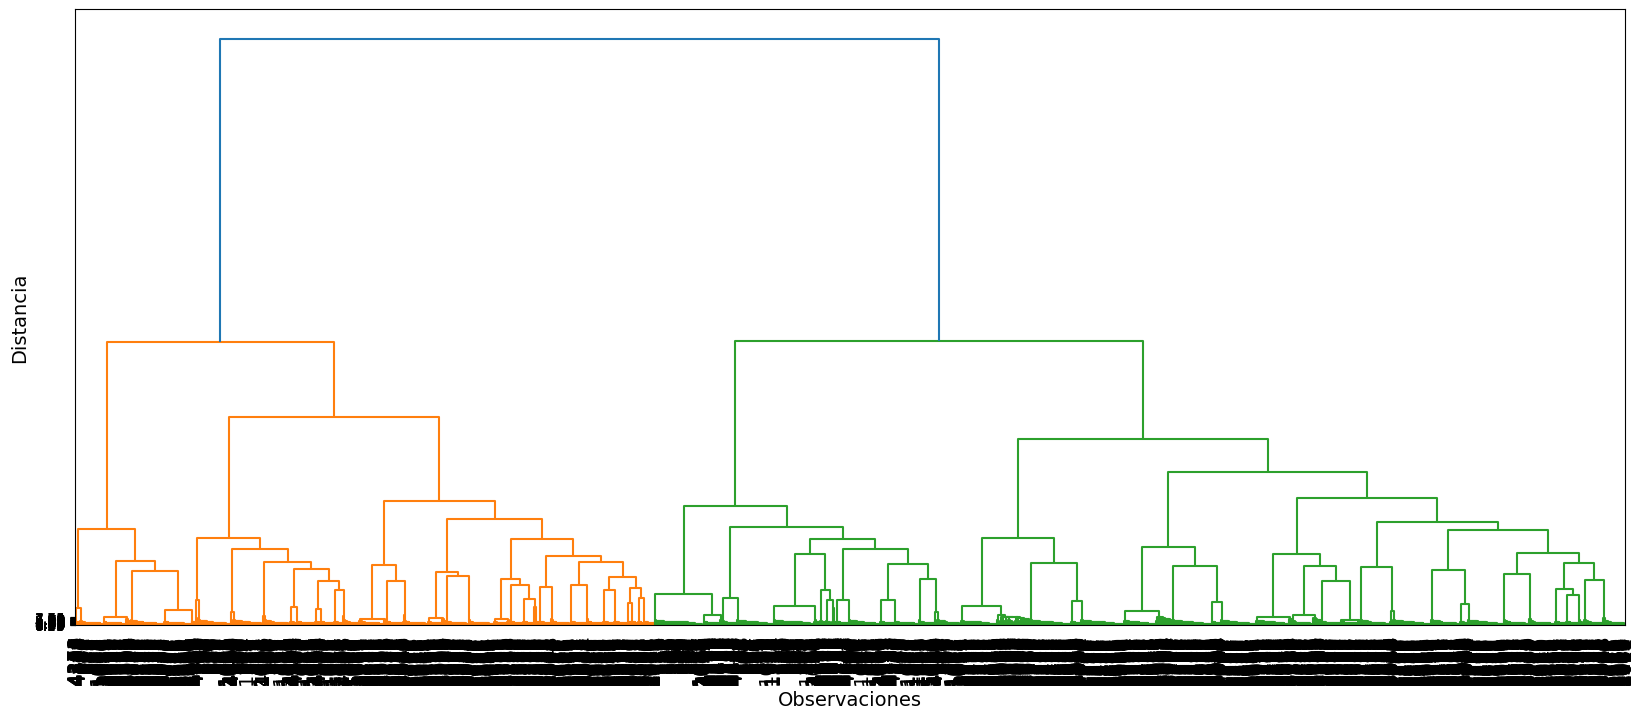

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 8, 0.25))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

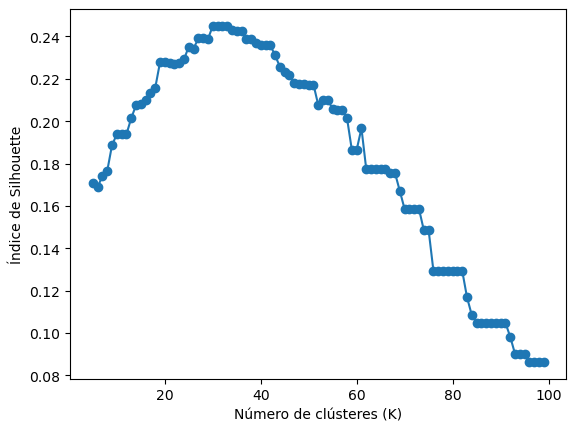

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouettes =[]
for t in range(5, 100):  # Prueba diferentes valores de t
    labels = fcluster(Z, t=t, criterion='distance') #AgglomerativeClustering(n_clusters=t)
    #print(f"t = {t}, Silhouette Score = {score}")
    try:
        score = silhouette_score(df_dummies, labels)
        silhouette = score
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    
plt.plot(range(5, 100), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

In [12]:
t_op = silhouettes.index(max(silhouettes))
t_op

25

In [13]:
clusters_jerarquicos = fcluster(Z, t=t_op, criterion='distance')

In [14]:
usuarios2= usuarios.copy()

In [15]:
usuarios2['Cluster Jerarquico Gower'] = clusters_jerarquicos

### 1.2 DBSCAN

In [106]:
usuarios = pd.read_csv("df_coordenadas2.csv", index_col=0)
usuarios.head()

,brandingInterest,userAgeBracket,userGender,country,region,sessions,Lon,Lat
0,News & Politics/Avid News Readers/Entertainmen...,25-34,female,United States,California,107,36.116203,-119.681564
1,News & Politics/Avid News Readers/Entertainmen...,35-44,female,United States,California,106,36.116203,-119.681564
2,Media & Entertainment/Light TV Viewers,35-44,female,United States,California,99,36.116203,-119.681564
3,Media & Entertainment/Movie Lovers,35-44,female,United States,California,95,36.116203,-119.681564
4,Media & Entertainment/TV Lovers,35-44,female,United States,California,95,36.116203,-119.681564


In [17]:
usuarios_dbscan = usuarios.drop(columns=['country','region','sessions'])

In [18]:
# Seleccionar las variables categóricas
cat_vars = ['userAgeBracket', 'userGender','country','region','brandingInterest']
# Seleccionar las variables numéricas
num_vars = ['Lon', 'Lat']
scaler = StandardScaler()
usuarios_dbscan[num_vars] = scaler.fit_transform(usuarios_dbscan[num_vars])

In [19]:
D = pd.DataFrame.from_dict(usuarios_dbscan)
D = D.reset_index(drop=True)
D[['userAgeBracket', 'userGender','brandingInterest']]= D[['userAgeBracket', 'userGender','brandingInterest']].astype('object')

In [20]:
from gower import gower_matrix
import gower
distance_matrix = gower.gower_matrix(D)
pd.DataFrame(distance_matrix)

,0,1,2,3,4,5,6,7,8,9,...,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502
0,0.000000,0.200000,0.400000,0.400000,0.400000,0.400000,0.400000,0.200000,0.400000,0.200000,...,0.722188,0.287511,0.087511,0.487511,0.487511,0.487511,0.487511,0.487511,0.720999,0.455036
1,0.200000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.400000,0.200000,0.400000,...,0.522188,0.087511,0.287511,0.287511,0.287511,0.287511,0.287511,0.287511,0.720999,0.255036
2,0.400000,0.200000,0.000000,0.200000,0.200000,0.200000,0.200000,0.400000,0.200000,0.400000,...,0.522188,0.287511,0.487511,0.287511,0.287511,0.287511,0.287511,0.087511,0.720999,0.455036
3,0.400000,0.200000,0.200000,0.000000,0.200000,0.200000,0.200000,0.400000,0.200000,0.400000,...,0.522188,0.287511,0.487511,0.287511,0.287511,0.087511,0.287511,0.287511,0.720999,0.455036
4,0.400000,0.200000,0.200000,0.200000,0.000000,0.200000,0.200000,0.400000,0.200000,0.400000,...,0.522188,0.287511,0.487511,0.287511,0.287511,0.287511,0.087511,0.287511,0.720999,0.455036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,0.487511,0.287511,0.287511,0.087511,0.287511,0.287511,0.287511,0.487511,0.287511,0.487511,...,0.549732,0.200000,0.400000,0.200000,0.200000,0.000000,0.200000,0.200000,0.693455,0.367525
4499,0.487511,0.287511,0.287511,0.287511,0.087511,0.287511,0.287511,0.487511,0.287511,0.487511,...,0.549732,0.200000,0.400000,0.200000,0.200000,0.200000,0.000000,0.200000,0.693455,0.367525
4500,0.487511,0.287511,0.087511,0.287511,0.287511,0.287511,0.287511,0.487511,0.287511,0.487511,...,0.549732,0.200000,0.400000,0.200000,0.200000,0.200000,0.200000,0.000000,0.693455,0.367525
4501,0.720999,0.720999,0.720999,0.720999,0.720999,0.720999,0.720999,0.720999,0.720999,0.720999,...,0.843187,0.693455,0.693455,0.693455,0.693455,0.693455,0.693455,0.693455,0.000000,0.757394


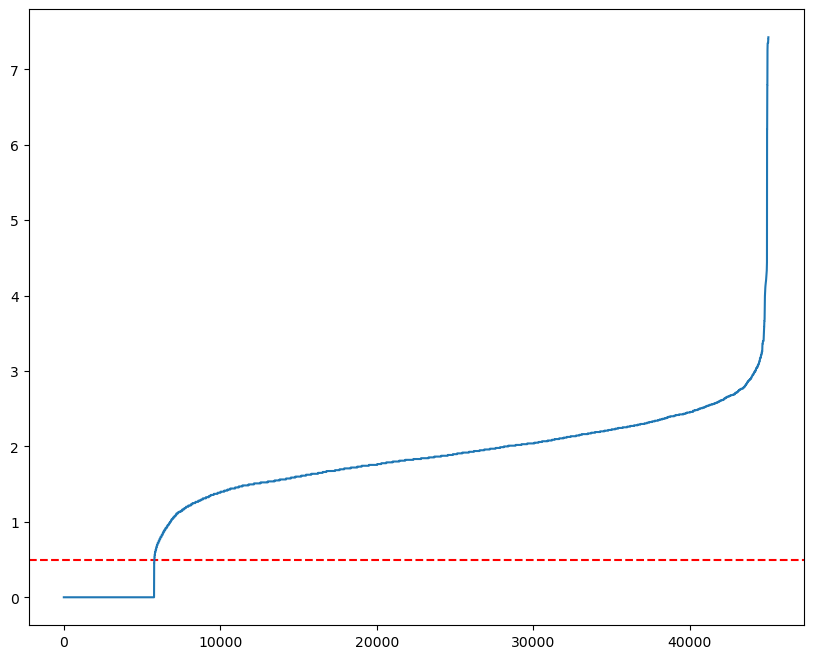

In [21]:
# Cargamos NeighborsNeighbors
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(distance_matrix)
distancias, indices = nbrs.kneighbors(distance_matrix)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.plot(distancias)

In [22]:
from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

2.4738633522405964


In [23]:
eps_model = distancias[knee.knee]

Text(0.5, 1.0, 'Se encontraron 64 clusteres para epsilon 2.47')

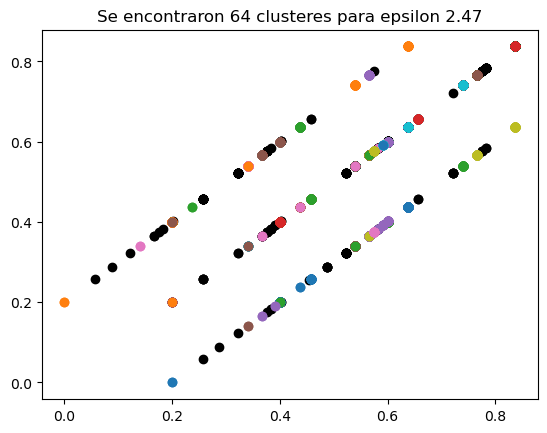

In [24]:
db = DBSCAN(eps = eps_model, min_samples = 9).fit(distance_matrix)
clusteres = db.labels_
n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(distance_matrix).assign(Cluster = clusteres)
plt.figure()
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, eps_model))

In [25]:
usuarios2['Cluster DBSCAN Gower'] = clusteres

## 2. Variables Categoricas a Dummies - Distancia Euclidiana - PCA

### 2.1 Kmeans

In [26]:
usuarios = pd.read_csv("df_coordenadas2.csv", index_col=0)
usuarios.head()
usuarios_j = usuarios.drop(columns=['country','region','sessions'])

# Seleccionar las variables categóricas
cat_vars = ['userAgeBracket', 'userGender','brandingInterest']
# Seleccionar las variables numéricas
num_vars = ['Lon', 'Lat']
scaler = StandardScaler()
usuarios_j[num_vars] = scaler.fit_transform(usuarios_j[num_vars])

df_dummies = pd.get_dummies(usuarios_j, columns=cat_vars)
pca = PCA(0.95)  # Retener el 95% de la varianza
df_dummies_pca = pca.fit_transform(df_dummies)
standardized_data = scaler.fit_transform(df_dummies_pca)

In [27]:
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 100): # Evaluamos entre 1 a 300 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(standardized_data)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(df_dummies, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)

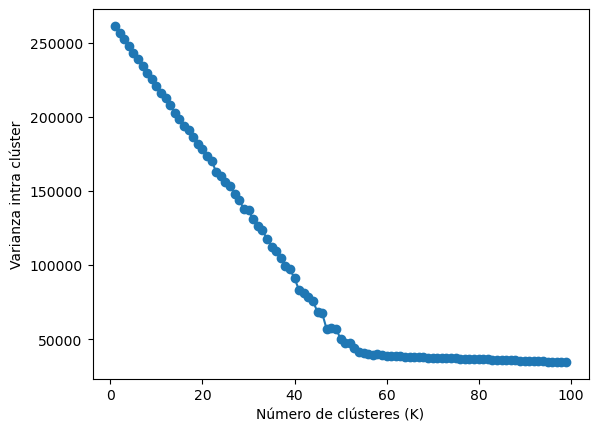

In [28]:
plt.plot(range(1, 100), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

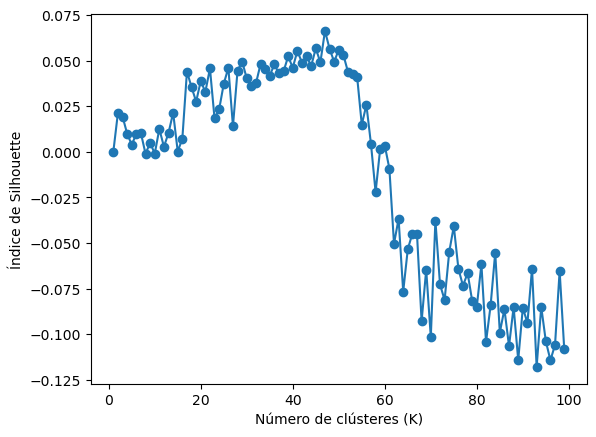

In [29]:
plt.plot(range(1, 100), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

In [30]:
sil_max = silhouettes.index(max(silhouettes))

In [31]:
kmeans_pca = KMeans(n_clusters = sil_max, random_state = 123, n_init=10).fit_predict(df_dummies_pca)

In [32]:
usuarios2['Cluster KMeans Dummies con PCA'] = kmeans_pca

### 2.2 Jerarquico

In [33]:
usuarios = pd.read_csv("df_coordenadas2.csv", index_col=0)
usuarios.head()

,brandingInterest,userAgeBracket,userGender,country,region,sessions,Lon,Lat
0,News & Politics/Avid News Readers/Entertainmen...,25-34,female,United States,California,107,36.116203,-119.681564
1,News & Politics/Avid News Readers/Entertainmen...,35-44,female,United States,California,106,36.116203,-119.681564
2,Media & Entertainment/Light TV Viewers,35-44,female,United States,California,99,36.116203,-119.681564
3,Media & Entertainment/Movie Lovers,35-44,female,United States,California,95,36.116203,-119.681564
4,Media & Entertainment/TV Lovers,35-44,female,United States,California,95,36.116203,-119.681564


In [34]:
usuarios_j = usuarios.drop(columns=['country','region','sessions'])

In [35]:
# Seleccionar las variables categóricas
cat_vars = ['userAgeBracket', 'userGender','brandingInterest']
# Seleccionar las variables numéricas
num_vars = ['Lon', 'Lat']
scaler = StandardScaler()
usuarios_j[num_vars] = scaler.fit_transform(usuarios_j[num_vars])

In [36]:
df_dummies = pd.get_dummies(usuarios_j, columns=cat_vars)

In [37]:
pca = PCA(0.95)  # Retener el 95% de la varianza
df_dummies_pca = pca.fit_transform(df_dummies)

In [38]:
df_dummies_pca

array([[ 1.32656014e+00, -6.25486158e-01, -6.12922797e-01, ...,
         2.47628035e-03, -7.41490158e-03, -5.35122835e-03],
       [ 1.32804361e+00, -5.50596922e-01, -6.14612607e-01, ...,
         2.36342163e-03, -6.19810142e-03, -7.49057743e-03],
       [ 1.32878377e+00, -5.57284492e-01, -6.15930133e-01, ...,
         2.47870748e-03, -7.02888333e-03, -7.89161218e-03],
       ...,
       [ 1.09549125e+00,  5.55021134e-01, -4.51354272e-01, ...,
         2.03095374e-03, -4.38465557e-03, -4.20254678e-03],
       [-1.87096192e-01,  3.40359564e-01,  4.99343931e-01, ...,
        -1.78750518e-03, -2.27098775e-02, -7.59192989e-03],
       [-2.24461540e-02,  2.61430048e+00, -1.37300600e-01, ...,
         2.24709670e-04,  1.58288196e-04,  2.13323227e-03]])

In [39]:
standardized_data = scaler.fit_transform(df_dummies_pca)

In [40]:
clusters = standardized_data

In [41]:
dist = pdist(standardized_data, metric='euclidean')
Z = linkage(dist, method='ward')

In [42]:
len(clusters)

4503

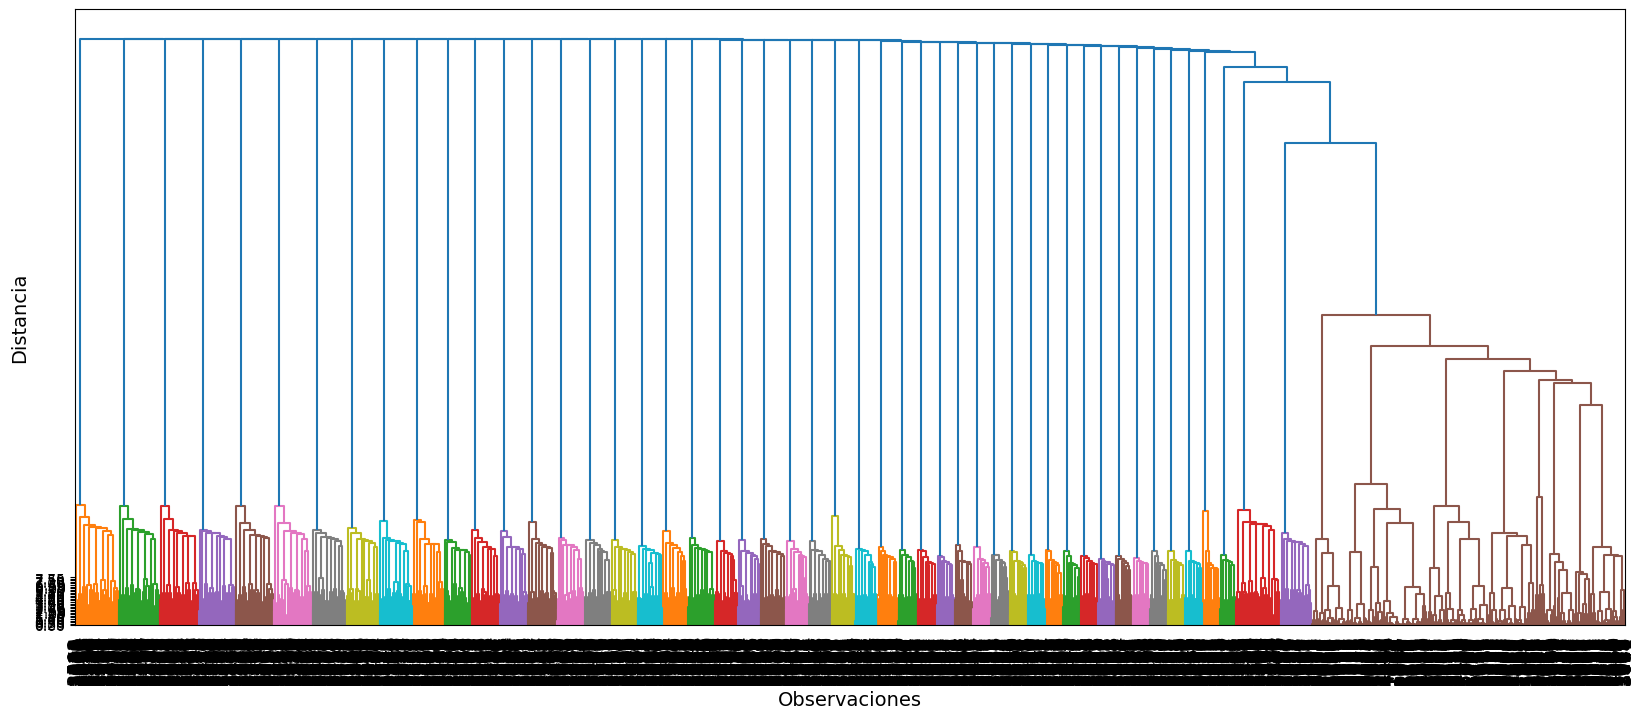

In [43]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(20, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 8, 0.25))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

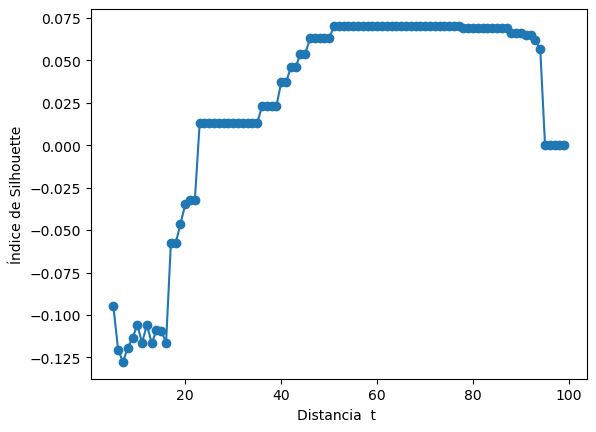

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouettes =[]
for t in range(5, 100):  # Prueba diferentes valores de t
    labels = fcluster(Z, t=t, criterion='distance') #AgglomerativeClustering(n_clusters=t)
    #print(f"t = {t}, Silhouette Score = {score}")
    try:
        score = silhouette_score(df_dummies, labels)
        silhouette = score
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    
plt.plot(range(5, 100), silhouettes, marker='o')
plt.xlabel('Distancia  t ')
plt.ylabel('Índice de Silhouette')
plt.show()

In [45]:
t_op = silhouettes.index(max(silhouettes))
t_op

46

In [46]:
from scipy.cluster.hierarchy import ward, fcluster
clusters_j_pca = fcluster(Z, t=t_op, criterion='distance')

In [47]:
len(Z)

4502

In [48]:
len(clusters_j_pca)

4503

In [49]:
usuarios2['Cluster Jerarquico Dummies con PCA'] = clusters_j_pca

In [50]:
max(clusters_j_pca)

51

### 2.3 DBSCAN

In [51]:
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(standardized_data)

distancias, indices = nbrs.kneighbors(standardized_data)
distancias = np.sort(distancias.flatten())
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

3.1701251738372918


In [52]:
eps_model = distancias[knee.knee]

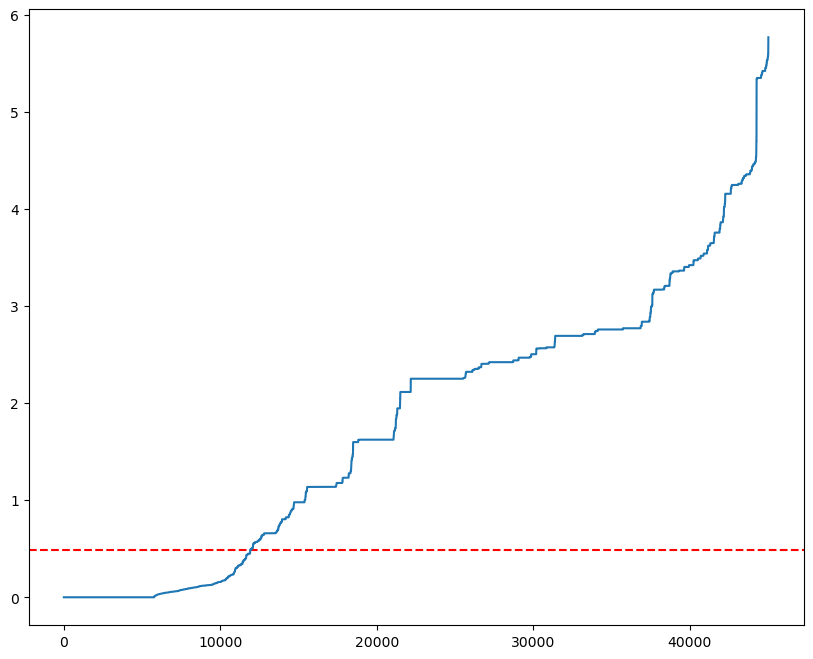

In [53]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(standardized_data)
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.49, color = 'r', linestyle = '--')
plt.plot(distancias)

In [54]:
# Parametro min samples 
min_samples_par = 5*2 -1

Text(0.5, 1.0, 'Se encontraron 140 clusteres para min_Samples 3.17')

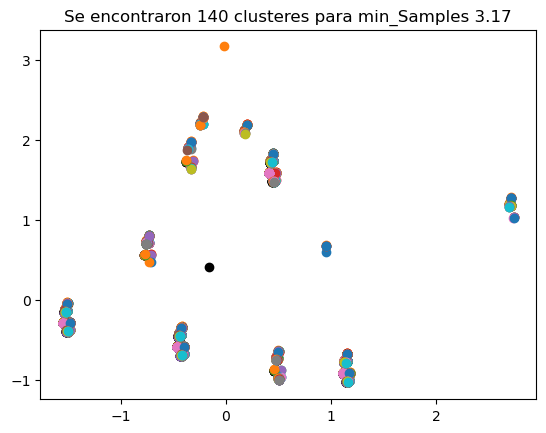

In [55]:
db = DBSCAN(eps = eps_model, min_samples = min_samples_par).fit(standardized_data)
clusteres = db.labels_
n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(standardized_data).assign(Cluster = clusteres)
plt.figure()
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para min_Samples %0.2f' % (n_clusteres, eps_model))

In [56]:
usuarios2['Cluster DBSCAN Dummies con PCA'] = clusteres

## 3. Variables Categoricas - Distancia Euclidiana  - FAMD

### 3.1 Kmeans FAMD

In [57]:
from prince import FAMD
import prince

In [58]:
usuarios = pd.read_csv("df_coordenadas2.csv", index_col=0)
usuarios.head()
usuarios_FAMD = usuarios.drop(columns=['country','region','sessions'])

In [59]:
famd = prince.FAMD(
    n_components=100,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)

In [60]:
famd = famd.fit(usuarios_FAMD)

In [61]:
famd.eigenvalues_summary.tail(10)

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
90,1.500,0.94%,87.10%
91,1.500,0.94%,88.04%
92,1.500,0.94%,88.98%
93,1.500,0.94%,89.92%
94,1.500,0.94%,90.86%
95,1.500,0.94%,91.80%
96,1.500,0.94%,92.74%
97,1.446,0.91%,93.65%
98,1.402,0.88%,94.53%


In [62]:
usuarios_FAMD_t=famd.transform(usuarios_FAMD)
usuarios_FAMD_t.head(1)

component,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.698642,0.623953,-1.431989,-0.925549,-0.950789,-0.642085,0.977835,0.89016,2.586537,0.207749,...,-0.451956,-0.957154,0.604935,0.649963,-0.655776,0.176126,0.052717,-0.12956,-0.957017,0.900736


In [63]:
standardized_data = scaler.fit_transform(usuarios_FAMD_t)

In [64]:
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 100): # Evaluamos entre 1 a 100 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(standardized_data)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(df_dummies, kmeans.labels_)
    except:
        print("error")
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)

error


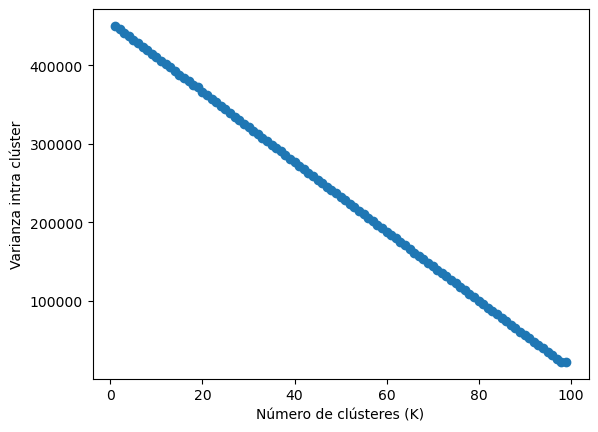

In [65]:
plt.plot(range(1, 100), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

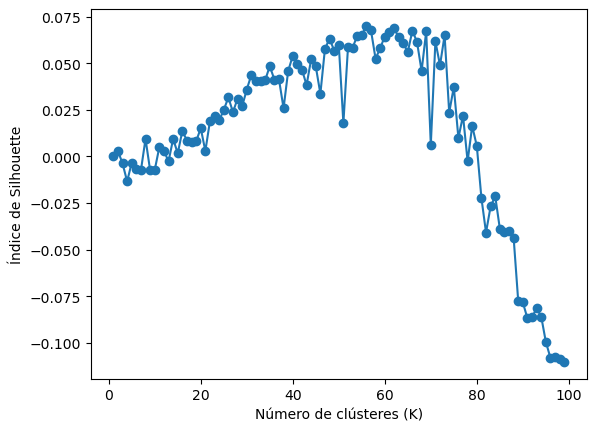

In [66]:
plt.plot(range(1, 100), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

In [67]:
clusters_opt = silhouettes.index(max(silhouettes))
clusters_opt

55

In [68]:
kmeans_famd = KMeans(n_clusters = clusters_opt, random_state = 123, n_init=10).fit_predict(standardized_data)

In [69]:
kmeans_famd

array([13, 13, 16, ..., 16, 46, 13])

In [70]:
usuarios2['Cluster KMeans FAMD'] = kmeans_famd

### 3.2 Jerarquico FAMD

In [71]:
dist = pdist(standardized_data, metric='euclidean')
Z = linkage(dist, method='ward')

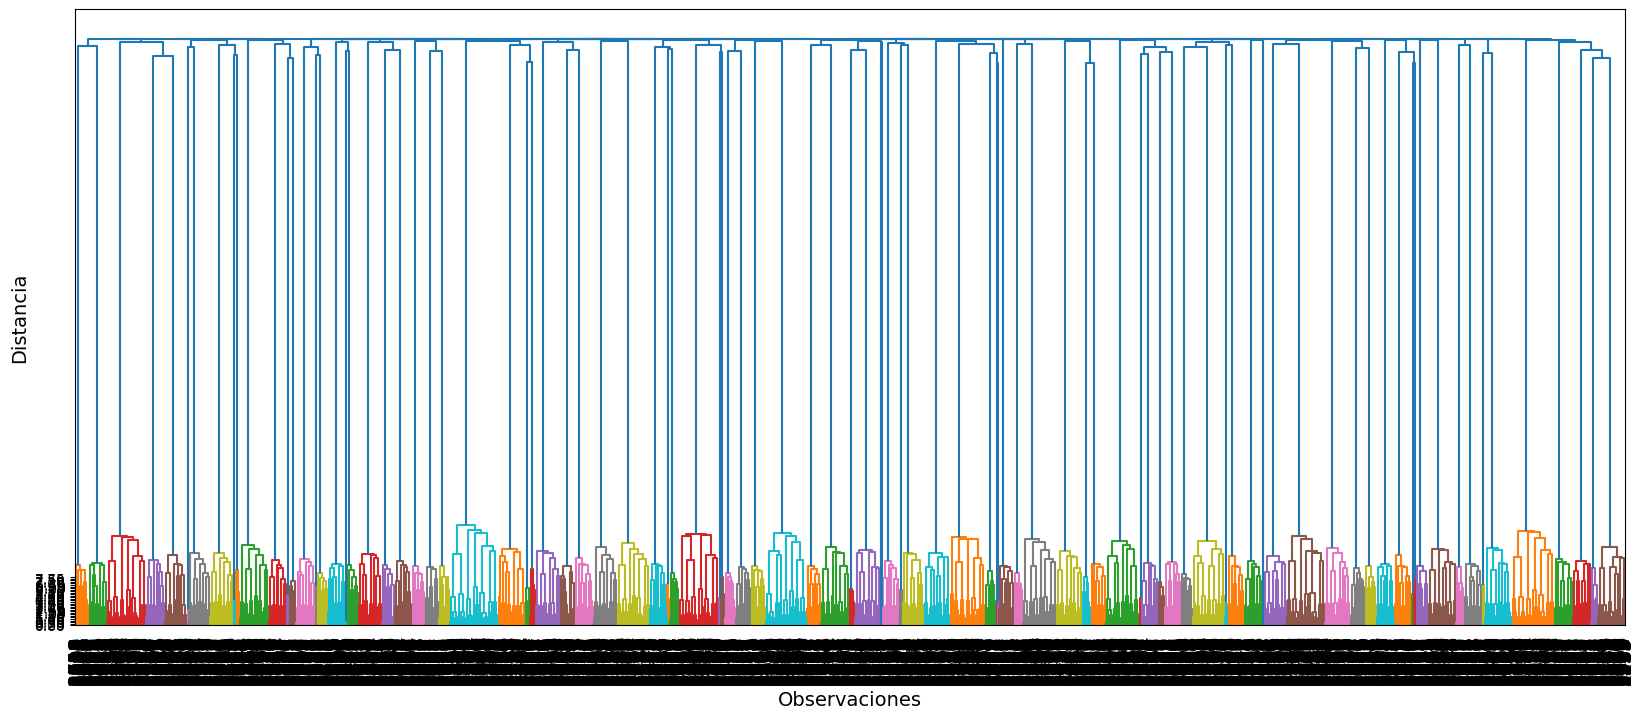

In [72]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(20, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 8, 0.25))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

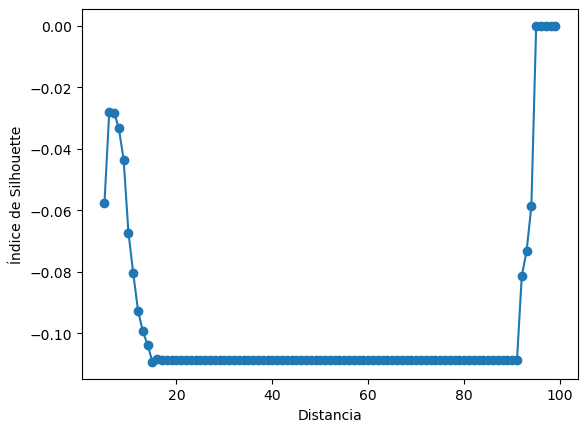

In [73]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouettes =[]
for t in range(5, 100):  # Prueba diferentes valores de t
    labels = fcluster(Z, t=t, criterion='distance') #AgglomerativeClustering(n_clusters=t)
    #print(f"t = {t}, Silhouette Score = {score}")
    try:
        score = silhouette_score(df_dummies, labels)
        silhouette = score
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    
plt.plot(range(5, 100), silhouettes, marker='o')
plt.xlabel('Distancia')
plt.ylabel('Índice de Silhouette')
plt.show()

In [74]:
t_op = silhouettes.index(max(silhouettes))
t_op

90

In [75]:
from scipy.cluster.hierarchy import ward, fcluster
clusters_famd_j = fcluster(Z, t=t_op, criterion='distance')

In [76]:
usuarios2['Cluster Jerarquico FAMD'] = clusters_famd_j

In [77]:
usuarios2.head(2)

,brandingInterest,userAgeBracket,userGender,country,region,sessions,Lon,Lat,Cluster Jerarquico Gower,Cluster DBSCAN Gower,Cluster KMeans Dummies con PCA,Cluster Jerarquico Dummies con PCA,Cluster DBSCAN Dummies con PCA,Cluster KMeans FAMD,Cluster Jerarquico FAMD
0,News & Politics/Avid News Readers/Entertainmen...,25-34,female,United States,California,107,36.116203,-119.681564,35,1,16,48,0,13,27
1,News & Politics/Avid News Readers/Entertainmen...,35-44,female,United States,California,106,36.116203,-119.681564,31,0,4,48,1,13,27


### 3.3 DBSCAN FAMD

In [78]:
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(standardized_data)

distancias, indices = nbrs.kneighbors(standardized_data)
distancias = np.sort(distancias.flatten())
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

2.8124250904007857


In [79]:
eps_model = distancias[knee.knee]

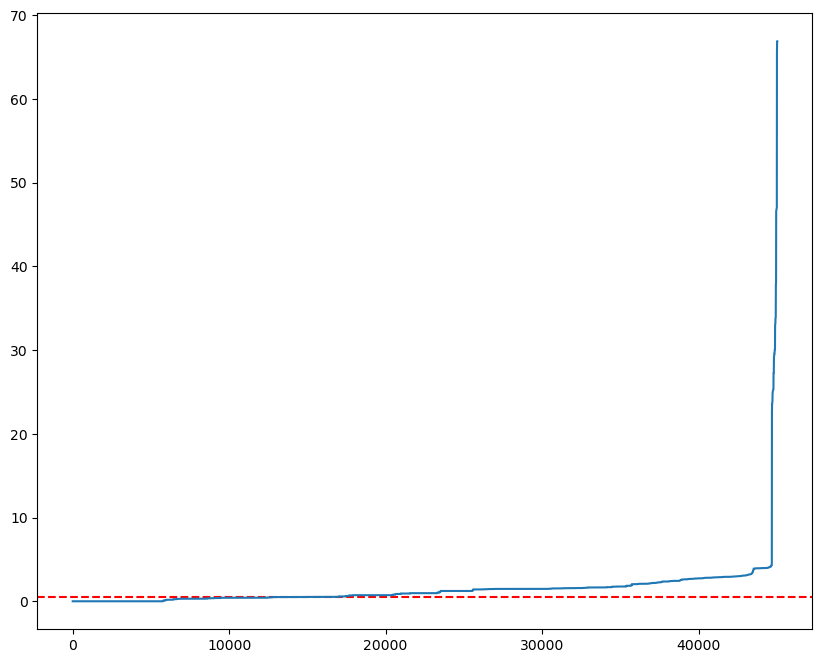

In [80]:
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(standardized_data)
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.49, color = 'r', linestyle = '--')
plt.plot(distancias)

Text(0.5, 1.0, 'Se encontraron 84 clusteres para min_Samples 2.81')

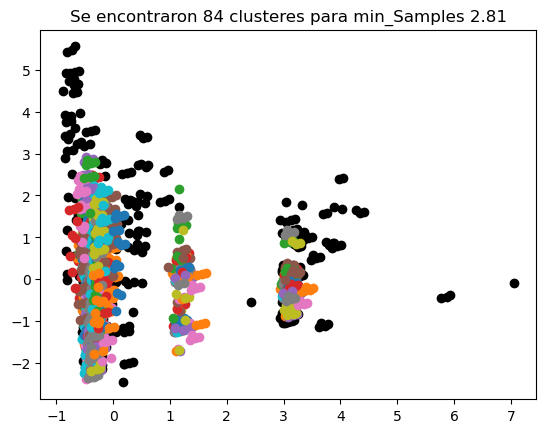

In [81]:
db = DBSCAN(eps = eps_model, min_samples = min_samples_par).fit(standardized_data)
clusteres = db.labels_
n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(standardized_data).assign(Cluster = clusteres)
plt.figure()
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para min_Samples %0.2f' % (n_clusteres, eps_model))

In [82]:
usuarios2['Cluster DBSCAN FAMD'] = clusteres

### 4.1 silhouette

In [83]:
usuarios2.columns

Index(['brandingInterest', 'userAgeBracket', 'userGender', 'country', 'region',
       'sessions', 'Lon', 'Lat', 'Cluster Jerarquico Gower',
       'Cluster DBSCAN Gower', 'Cluster KMeans Dummies con PCA',
       'Cluster Jerarquico Dummies con PCA', 'Cluster DBSCAN Dummies con PCA',
       'Cluster KMeans FAMD', 'Cluster Jerarquico FAMD',
       'Cluster DBSCAN FAMD'],
      dtype='object')

In [117]:
List_clusters = ['Cluster Jerarquico Gower','Cluster DBSCAN Gower', 'Cluster KMeans Dummies con PCA',
       'Cluster Jerarquico Dummies con PCA', 'Cluster DBSCAN Dummies con PCA',
       'Cluster KMeans FAMD', 'Cluster Jerarquico FAMD',
       'Cluster DBSCAN FAMD']
silhouette_list = []
for cluster_1 in List_clusters :
    silhouette = silhouette_score(df_dummies_pca, usuarios2[cluster_1])
    silhouette_list.append(round(silhouette,3))
silhouette_list

[0.3, 0.251, 0.249, 0.041, -0.024, 0.005, -0.252, -0.044]

In [85]:
c = usuarios2.columns
for i in c:
    num = len(usuarios2[i].unique())
    print(i + ' : '+ str(num))

brandingInterest : 98
userAgeBracket : 7
userGender : 3
country : 1
region : 13
sessions : 201
Lon : 13
Lat : 13
Cluster Jerarquico Gower : 62
Cluster DBSCAN Gower : 65
Cluster KMeans Dummies con PCA : 46
Cluster Jerarquico Dummies con PCA : 51
Cluster DBSCAN Dummies con PCA : 141
Cluster KMeans FAMD : 55
Cluster Jerarquico FAMD : 98
Cluster DBSCAN FAMD : 85


In [118]:
List_clusters = ['Cluster Jerarquico Gower','Cluster DBSCAN Gower', 'Cluster KMeans Dummies con PCA',
       'Cluster Jerarquico Dummies con PCA', 'Cluster DBSCAN Dummies con PCA',
       'Cluster KMeans FAMD', 'Cluster Jerarquico FAMD',
       'Cluster DBSCAN FAMD']
davies_bouldin_l = []
for cluster_1 in List_clusters :
     davies_bouldin = davies_bouldin_score(df_dummies_pca, usuarios2[cluster_1])
     davies_bouldin_l.append(round(davies_bouldin,3))
davies_bouldin_l

[1.425, 1.708, 1.604, 3.416, 2.962, 6.448, 8.361, 7.647]

In [87]:
usuarios2.head(2)

,brandingInterest,userAgeBracket,userGender,country,region,sessions,Lon,Lat,Cluster Jerarquico Gower,Cluster DBSCAN Gower,Cluster KMeans Dummies con PCA,Cluster Jerarquico Dummies con PCA,Cluster DBSCAN Dummies con PCA,Cluster KMeans FAMD,Cluster Jerarquico FAMD,Cluster DBSCAN FAMD
0,News & Politics/Avid News Readers/Entertainmen...,25-34,female,United States,California,107,36.116203,-119.681564,35,1,16,48,0,13,27,0
1,News & Politics/Avid News Readers/Entertainmen...,35-44,female,United States,California,106,36.116203,-119.681564,31,0,4,48,1,13,27,0


In [119]:
summ_tbl = pd.DataFrame()
summ_tbl['Metodo'] = List_clusters
list_80 = []
list_total = []
cluster1_sessions = []
pct_total = []
pct_avg = []
most_cluster = []
for i in List_clusters:
    tbl = pd.pivot_table(usuarios2, values="sessions", index= i, aggfunc="sum")
    tbl = tbl.sort_values(by='sessions', ascending=False)
    tbl['acc'] = tbl.sessions.cumsum()/tbl.sessions.sum()*100
    tbl1 = tbl[tbl.acc<80]
    
    list_80.append(len(tbl1))
    cluster1_sessions.append(tbl.sessions.iloc[0])
    pct_total.append(round(tbl.sessions.iloc[0]/tbl.sessions.sum()*100,2))
    list_total.append(len(tbl))
    pct_avg.append(round((tbl.sessions.sum()/len(tbl))*100/tbl.sessions.sum(),2))
    most_cluster.append(tbl.index[0])

summ_tbl['# Clusters'] = list_total
summ_tbl['Silhouette'] = silhouette_list
summ_tbl['Davies-Bouldin'] = davies_bouldin_l
summ_tbl['# Clusters <80%'] = list_80
summ_tbl['First Cluster'] = most_cluster
summ_tbl['Sessions of first cluster'] = cluster1_sessions
summ_tbl['Sessions First cluster%'] = pct_total
summ_tbl['Sessions per Cluster %'] = pct_avg
summ_tbl

,Metodo,# Clusters,Silhouette,Davies-Bouldin,# Clusters <80%,First Cluster,Sessions of first cluster,Sessions First cluster%,Sessions per Cluster %
0,Cluster Jerarquico Gower,62,0.300,1.425,28,31,9719,6.33,1.61
1,Cluster DBSCAN Gower,65,0.251,1.708,28,0,9719,6.33,1.54
2,Cluster KMeans Dummies con PCA,46,0.249,1.604,23,4,11014,7.18,2.17
3,Cluster Jerarquico Dummies con PCA,51,0.041,3.416,29,51,18606,12.13,1.96
4,Cluster DBSCAN Dummies con PCA,141,-0.024,2.962,63,-1,28033,18.27,0.71
5,Cluster KMeans FAMD,55,0.005,6.448,28,13,26008,16.95,1.82
6,Cluster Jerarquico FAMD,98,-0.252,8.361,40,27,9336,6.08,1.02
7,Cluster DBSCAN FAMD,85,-0.044,7.647,40,-1,9441,6.15,1.18


In [120]:
summ_tbl.to_csv('tablita.csv')

In [89]:
import session_info
session_info.show()

In [107]:
#Copia de la base de datos original
df_transformada = usuarios2.copy()
#Separar por columnas los intereses
df_transformada[['int1', 'int2', 'int3', 'int4']] = df_transformada['brandingInterest'].str.split('/', n=3, expand=True)
#Contar el nùmero de intereses totales para dividir equitativamente las sesiones
df_transformada['N_intreses'] = 4-df_transformada.isna().sum(axis=1)
df_transformada['sessions'] = df_transformada['sessions']/df_transformada['N_intreses']
df_transformada2=pd.melt(df_transformada, id_vars=['userAgeBracket','userGender','country','region','sessions','Cluster Jerarquico Gower','Cluster DBSCAN Gower', 'Cluster KMeans Dummies con PCA',
       'Cluster Jerarquico Dummies con PCA', 'Cluster DBSCAN Dummies con PCA',
       'Cluster KMeans FAMD', 'Cluster Jerarquico FAMD',
       'Cluster DBSCAN FAMD'], value_vars=['int1', 'int2','int3', 'int4'])
df_transformada2["brandingInterest"] = df_transformada2["value"]
df_transformada2 = df_transformada2.drop(columns=['variable'])
df_transformada2 = df_transformada2.drop(columns=['value'])

In [123]:
df_transformada2[df_transformada2['Cluster Jerarquico Gower']==31]['brandingInterest'].unique()

array(['News & Politics', 'Media & Entertainment', 'Lifestyles & Hobbies',
       'Technology', 'Shoppers', 'Travel', 'Food & Dining',
       'Beauty & Wellness', 'Home & Garden', 'Sports & Fitness',
       'Banking & Finance', 'Vehicles & Transportation',
       'Avid News Readers', 'Light TV Viewers', 'Movie Lovers',
       'TV Lovers', 'Shutterbugs', 'Technophiles', 'Shopping Enthusiasts',
       'Travel Buffs', 'Cooking Enthusiasts', 'Music Lovers',
       'Social Media Enthusiasts', 'Beauty Mavens',
       'Home Decor Enthusiasts', 'Health & Fitness Buffs', 'Sports Fans',
       'Frequently Visits Salons', 'Bargain Hunters', 'Fashionistas',
       'Avid Investors', 'Foodies', 'Business Professionals',
       'Outdoor Enthusiasts', 'Frequently Dines Out', 'Family-Focused',
       'Shoppers by Store Type', 'Green Living Enthusiasts',
       'Frequently Attends Live Events', 'Mobile Enthusiasts',
       'Pet Lovers', 'Book Lovers', 'Value Shoppers',
       'Art & Theater Aficionados'